In [45]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

#import data file
file_path = 'Offenders, states and territories.xlsx'

# Read in all sheets
df_dict = pd.read_excel(file_path, engine='openpyxl', 
                        sheet_name=['Table 7','Table 8','Table 9','Table 10','Table 11','Table 12','Table 13','Table 14'],
                      skiprows=([i for i in range(0, 4)] + [j for j in range(7, 43)]))

# Concat dict to one df
df = pd.concat(df_dict)
df = df.reset_index(drop=False)

df

,level_0,level_1,Unnamed: 0,Number,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Table 7,0,Principal offence(b)(c),2008–09,2009–10,2010–11,2011–12,2012–13,2013–14,2014–15,...,2011–12,2012–13,2013–14,2014–15,2015–16,2016–17,2017–18,2018–19,2019–20,2020–21
1,Table 7,1,NaN,Males,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Table 7,2,01 Homicide and related offences,283,337,324,260,260,233,245,...,4.1,4.1,3.6,3.7,3.7,3.5,3.5,3.9,4,3.2
3,Table 7,3,02 Acts intended to cause injury(d),28535,28346,28390,26375,26839,27800,27784,...,416.6,418.9,428.1,421.9,434.5,433.8,429.5,446.5,451.2,477.2
4,Table 7,4,03 Sexual assault and related offences,1427,1478,1357,1436,1494,1809,1849,...,22.7,23.3,27.9,28.1,30.8,32.5,34,34.4,35.8,38.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Table 14,23,(f) Includes offenders with an unknown princip...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,Table 14,24,(g) Includes offenders with an unknown sex.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,Table 14,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,Table 14,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Drop invalid columns + rows
df.drop('level_1', inplace=True, axis=1)

# Drop years 2008 - 2016
df = df.drop(df.columns[[2,3,4,5,6,7,8,9,15,16,17,18,19,20,21,22,]],axis = 1)

# set nan value to index
df.iloc[0,1] = 'Principle Offence'

# move first row to column headers
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

#remove NaNs
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

#remove Principal offence/total row duplicates from all spreadsheets
df = df[df["Principle Offence"].str.contains("Principal offence") == False]
df = df[df["Principle Offence"].str.contains("Total") == False]

# Rename columns
df.rename(columns={'Table 7':'State'}, inplace=True)


# Set new index
df = df.set_index('State')
df = df.rename(index={'Table 7': 'NSW',
                      'Table 8': 'VIC',
                      'Table 9': 'QLD',
                      'Table 10': 'SA',
                      'Table 11': 'WA',
                      'Table 12': 'TAS',
                      'Table 13': 'NT',
                      'Table 14': 'ACT'})

df.columns.values[6] = '2016 - 2017 average'
df.columns.values[7] = '2017 - 2018 average'
df.columns.values[8] = '2018 - 2019 average'
df.columns.values[9] = '2019 - 2020 average'
df.columns.values[10] = '2020 - 2021 average'

#pd.set_option('display.max_rows', None)
#df.columns
df


,Principle Offence,2016–17,2017–18,2018–19,2019–20,2020–21,2016 - 2017 average,2017 - 2018 average,2018 - 2019 average,2019 - 2020 average,2020 - 2021 average
State,,,,,,,,,,,
NSW,01 Homicide and related offences,236,242,275,287,232,3.5,3.5,3.9,4,3.2
NSW,02 Acts intended to cause injury(d),29496,29698,31376,32122,34199,433.8,429.5,446.5,451.2,477.2
NSW,03 Sexual assault and related offences,2210,2352,2415,2552,2731,32.5,34,34.4,35.8,38.1
NSW,04 Dangerous/negligent acts(e),452,165,94,78,90,6.6,2.4,1.3,1.1,1.3
NSW,05 Abduction/harassment(d),1037,993,984,1063,1117,15.3,14.4,14,14.9,15.6
...,...,...,...,...,...,...,...,...,...,...,...
ACT,11 Weapons/explosives,128,152,152,158,140,36.3,42.2,41.4,42.6,37.3
ACT,12 Property damage and environmental pollution,189,135,134,153,120,53.7,37.5,36.5,41.2,32
ACT,13 Public order offences,484,432,293,269,261,137.4,119.9,79.8,72.4,69.6


In [47]:
#Total principle offences by state/year
state_total = df.groupby('State').sum()
state_total = state_total.drop(df.columns[[0]],axis = 1)
state_total

#state_total_best = state_total.sort_values("2020–21", ascending=False)
#state_total_best

,2016–17,2017–18,2018–19,2019–20,2020–21,2016 - 2017 average,2017 - 2018 average,2018 - 2019 average,2019 - 2020 average,2020 - 2021 average
State,,,,,,,,,,
ACT,2011,2015,1791,1689,1557,570.9,559.3,487.9,454.8,415.1
NSW,128781,126261,122005,116919,110506,1894.1,1826.2,1736.0,1642.1,1542.3
NT,8976,9497,8179,6845,5995,4323.9,4527.3,3905.9,3268.3,2839.2
QLD,91495,88356,87474,86391,82274,2160.1,2048.2,1988.6,1928.9,1810.6
SA,49319,46416,44571,36871,31278,3265.6,3049.2,2898.8,2371.5,1996.0
TAS,8546,8051,7719,6759,6378,1871.7,1738.6,1641.5,1417.6,1326.3
VIC,75863,77276,75994,74192,78552,1391.7,1385.3,1330.4,1271.5,1342.7
WA,33362,33284,31807,30233,27873,1499.6,1486.0,1406.4,1317.3,1199.3


<IPython.core.display.Javascript object>


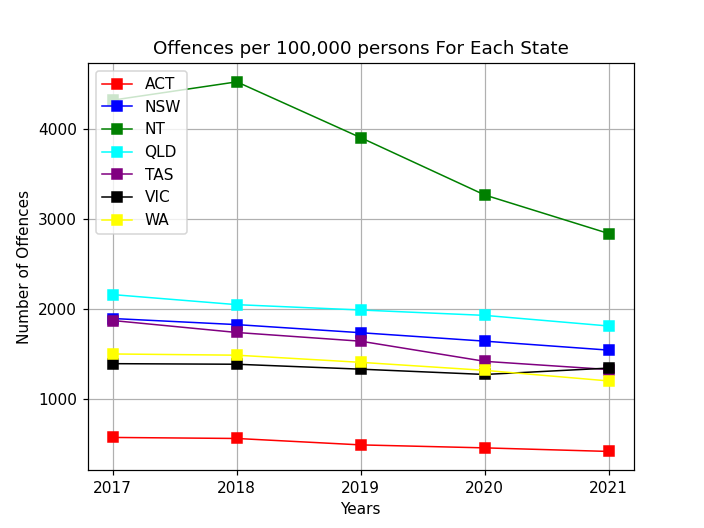

AttributeError: 'function' object has no attribute 'show'

In [59]:
#Rate per 100,000 persons aged 10 years and over for the state/territory of interest.
years = [2017,2018,2019,2020,2021]


ACT= [570.9,559.3,487.9,454.8,415.1]
NSW= [1894.1,1826.2,1736.0,1642.1,1542.3]
NT= [4323.9,4527.3,3905.9,3268.3,2839.2]
QLD= [2160.1,2048.2,1988.6,1928.9,1810.6]
SA= [3265.6,3049.2,2898.8,2371.5,1996.0]
TAS= [1871.7,1738.6,1641.5,1417.6,1326.3]
VIC= [1391.7,1385.3,1330.4,1271.5,1342.7]
WA= [1499.6,1486.0,1406.4,1317.3,1199.3]

ACT = plt.plot(test, ACT, marker="s", color="Red", linewidth=1, label="ACT")
NSW = plt.plot(test, NSW, marker="s", color="Blue", linewidth=1, label="NSW")
NT = plt.plot(test, NT, marker="s", color="Green", linewidth=1, label="NT")
QLD = plt.plot(test, QLD, marker="s", color="Cyan", linewidth=1, label="QLD")
TAS = plt.plot(test, TAS, marker="s", color="Purple", linewidth=1, label="TAS")
VIC = plt.plot(test, VIC, marker="s", color="Black", linewidth=1, label="VIC")
WA = plt.plot(test, WA, marker="s", color="Yellow", linewidth=1, label="WA")



plt.title("Offences per 100,000 persons For Each State")
plt.xlabel("Years")
plt.ylabel("Number of Offences")
plt.xticks(years)
plt.grid()
plt.legend(loc='upper left')

plt.savefig('Offences per 100,000 persons For Each State.png', bbox_inches='tight')

ax = plt.plot.show
ax





In [58]:
bar_test = df.groupby(['State']).sum()["2020–21"]
bar_plot = bar_test.plot.bar(color='r', alpha=0.5, width =0.8, align="center")

bar_plot.set_title("test y")
bar_plot.set_ylabel("test x")
bx = bar_plot.show
bx


AttributeError: 'AxesSubplot' object has no attribute 'show'